# PCA

Motivation : can we decribe high-dimensional data in a "simplar" way?

#### To remove the collinearity 
for the independent assumption - Independent variables can be correlated each other?

#### For interpretability
To make latent variables 

#### For the analysis accuracy
To reduce the noise 

## Why dimensionality reduction
- Summarization of data (p) variables by a smaller set of (k) derived (synthetic, composite) variables
- Fewer dimension, less chances of overfitting, better generalization
- need to balancing act between clarity of representation and ease of understanding & oversimplification
- Speeding up learning algorithms
- Less storage requirement
- Dimention reduction is Feature Extraction

## IDEA : highly correlated data contains redundant feature (not change data structure)

- variance : 데이터의 정보량을 표현하는 요소임

- Data -> Projection onto unit vector
### PC (Principal Component)
- Maximize variance (most separable)
- Minimize the sum of squares ()

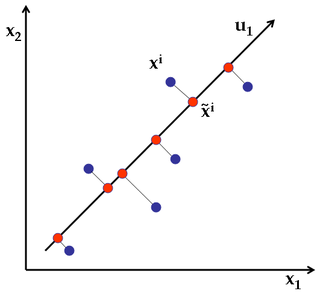

###### optional : Signal to Noise (SNR) 값에 따라 추가적인 차원감소방법을 생각 할 수 있다
만약 PCA 의 백터들이 선형분포라면

- Signal : 분산이 최대가 되는 방향 백터
- Noise : Signal 과 수직인 방향의 백터

$SNR = \sigma^2_{signal}/\sigma^2_{noise}$

PCA는 이 SNR이 최대가 된다, 

# Overview. 

1. 먼저 데이터를 이루는 백터 간 Scale을 맞추기 위해, 표준화를 시도한다.
2. 표준화된 데이터의 '공분산행렬'을 구한다.
3. 공분산 행렬의 고유분해를 통해, 고유벡터의 행렬과 고유값을 구한다.
4. '고유값의 크기순'대로 고유값과 고유벡터를 정렬한다.
5. '데이터를 설명할 수 있는 충분한 변화량(분산)'을 갖는 주성분 개수 k개를 구한다.
6. k개의 고유백터만을 유지하고, 나머지 작은 고유벡터는 제거한다.
7. 표준화된 데이터 k개에 고유벡터 행렬을 곱하여 고유공간으로 projection 시킨다.

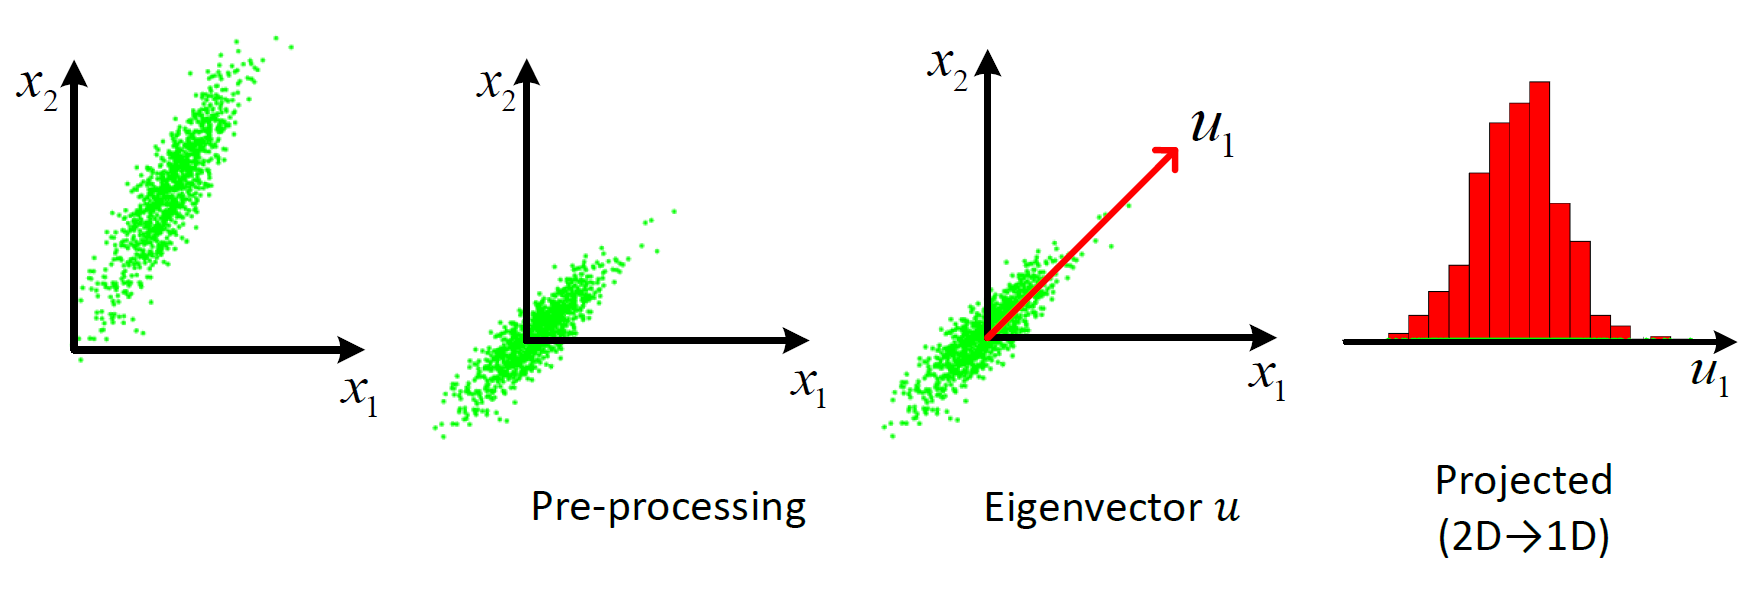

# Step1. Pre-processing (백터간 Scale을 맞추기 위한 표준화)


1. Given data
$$
x^{(i)} = \begin{bmatrix} x^{(i)}_1 \\ \vdots \\x^{(i)}_n \end{bmatrix},\qquad X = \begin{bmatrix} \cdots & (x^{(1)})^T & \cdots\\
\cdots & (x^{(2)})^T & \cdots\\
& \vdots & \\
\cdots & (x^{(m)})^T & \cdots\\
\end{bmatrix}
$$

### 1.1 Shift to zero mean

linearity 의 환경 아래에서 유닛백터를 보기 위해, 주어진 dependent variable들을 고정점(0,0)으로 이동시킨다.
$$
\begin{align*}
\mu &= \frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)} \\
x^{(i)} &\leftarrow x^{(i)} - \mu \quad \text{(zero mean)}
\end{align*}
$$

### 1.2 Rescaling

unit variance 를 보기 위해
$$
\begin{align*}
\sigma^2_j &= \frac{1}{m-1}\sum\limits_{i=1}{m}\left(x_j^{(i)}\right)^2 \\
x^{(i)}_j &\leftarrow \frac{x^{(i)}_j}{\sigma_j} \\
\end{align*}
$$

# Step2. Maximize variance

1. Find unit vector ${u}$ such that maximizes variance of projections



In [35]:
#rescaling feature vector to have the same scale
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [36]:
def my_pca(input,ReduceDim=0): # ${x_i-x_bar/sigma}$
    data=StandardScaler().fit_transform(input)
    C=np.cov(data.T)    #공분산 행렬
    evals,evecs=np.linalg.eig(C)    #고유벡터와 고유값 계산 (고유분해)
    indices=np.argsort(evals)[::-1]    #큰 고유값의 순서대로, 고유값과 고유벡터를 정렬
    evecs=evecs[:,indices]
    evals=evals[indicies]
    
    if DeduceDim > 0:
        evecs=evecs[:,:ReduceDim]
    
    Explained_var_ratio=(sum(evals[:ReduceDim])/sum(evals))    #주성분의 변화량이 전체 변화량을 설명하는 정도
    x=np.dot(data,evecs)     #표준화된 데이터에 고유백터행렬을 곱해 고유공간으로 회전변환
    y=np.dot(x,evecs.T)    #변환된 데이터에 역 변환행렬을 곱해 원래 데이터로 근사

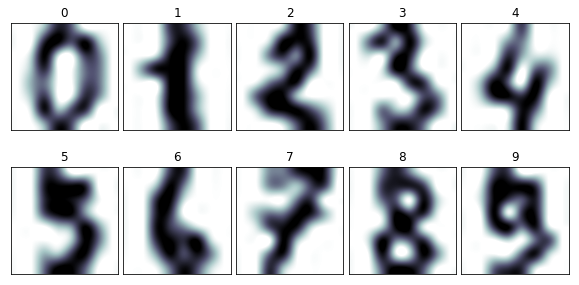

In [37]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

N=2; M=5;
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone_r, interpolation="spline36")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])

In [40]:
type(X_digits)

numpy.ndarray